In [1]:
import pandas as pd

In [2]:
import re

In [5]:
print(open('data/spambase.names').read())

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of

In [7]:
names = re.findall('^(.+):', open('data/spambase.names').read(), re.MULTILINE)

In [9]:
del names[0]
names.append('label')

In [11]:
data = pd.read_csv('data/spambase.data', names=names)

In [12]:
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [27]:
depths = range(2,30)

In [14]:
X, y = data[names[:-1]], data['label']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [33]:
train_acc = []
test_acc = []

In [34]:
for depth in depths:
    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3)
    model = DecisionTreeClassifier(max_depth=depth).fit(Xtr, ytr)
    train_acc.append(accuracy_score(y_pred=model.predict(Xtr),
                                    y_true=ytr))
    test_acc.append(accuracy_score(y_pred=model.predict(Xte),
                                    y_true=yte))

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

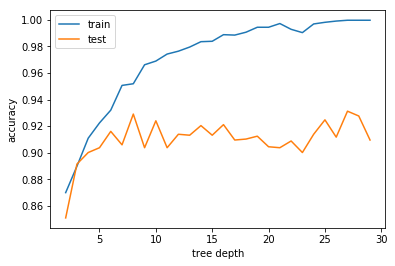

In [35]:
plt.plot(depths, train_acc, label='train')
plt.plot(depths, test_acc, label='test')
plt.legend()
plt.xlabel('tree depth')
plt.ylabel('accuracy')

In [36]:
from sklearn.model_selection import cross_val_score

In [50]:
depths = range(1, 20)

In [61]:
scores = [cross_val_score(DecisionTreeClassifier(max_depth=d), X, y, cv=20)
          for d in depths]

In [38]:
import numpy as np

In [62]:
means, sds = [[f(s) for s in scores] for f in (np.mean, np.std)]

<Container object of 3 artists>

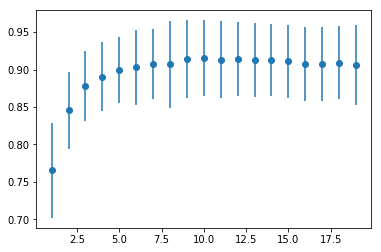

In [63]:
plt.errorbar(depths, means, yerr=sds, fmt='o')

In [54]:
from sklearn.ensemble import AdaBoostClassifier

In [56]:
Ns = range(10, 210, 20)
ada_scores = [cross_val_score(AdaBoostClassifier(n_estimators=nest), X, y, cv=5, n_jobs=5)
              for nest in Ns]

In [57]:
means, sds = [[f(s) for s in ada_scores] for f in (np.mean, np.std)]

<Container object of 3 artists>

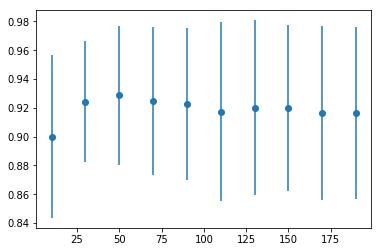

In [60]:
plt.errorbar(Ns, means, yerr=sds, fmt='o')